In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("cleaned_telco_churn.csv")

# Drop unnecessary columns
df_model = df.drop(columns=["customerID", "TenureGroup"])

# Encode target variable
df_model["Churn"] = df_model["Churn"].map({"Yes": 1, "No": 0})

# Label encode all categorical features
label_encoders = {}
for col in df_model.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Split features and target
X = df_model.drop("Churn", axis=1)
y = df_model["Churn"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and performance
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



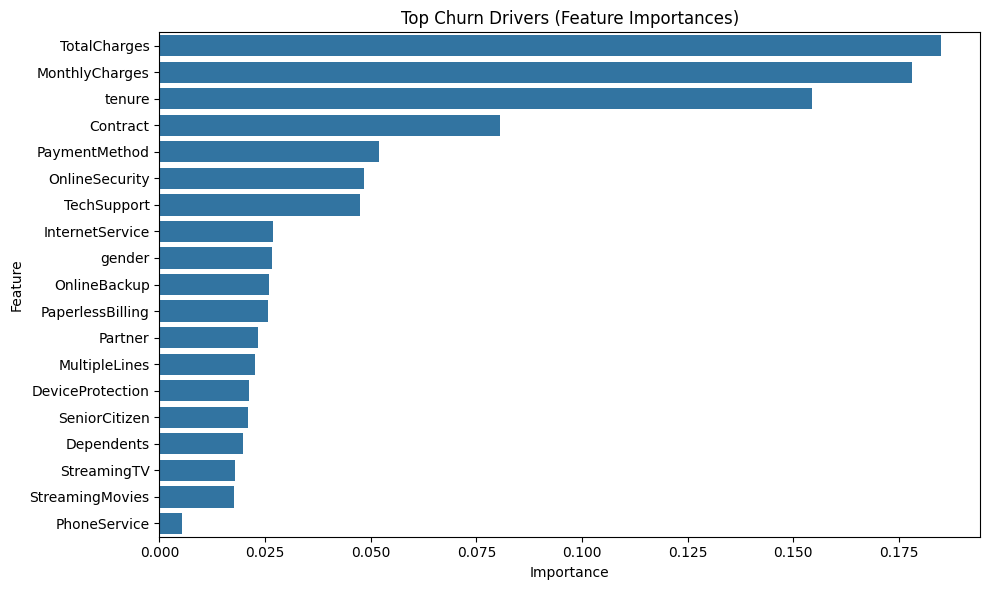

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances
importances = model.feature_importances_
features = X.columns

# Create DataFrame and plot
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df)
plt.title("Top Churn Drivers (Feature Importances)")
plt.tight_layout()
plt.show()


In [4]:
# Create a copy of test data to simulate
X_test_simulated = X_test.copy()

# Decode 'Contract' back to original for manipulation
contract_le = label_encoders["Contract"]
X_test_simulated["Contract"] = contract_le.inverse_transform(X_test["Contract"])

# Simulate strategy: Convert "Month-to-month" to "One year"
X_test_simulated["Contract"] = X_test_simulated["Contract"].replace("Month-to-month", "One year")

# Re-encode 'Contract'
X_test_simulated["Contract"] = contract_le.transform(X_test_simulated["Contract"])

# Predict churn probabilities before and after simulation
original_churn_probs = model.predict_proba(X_test)[:, 1]
simulated_churn_probs = model.predict_proba(X_test_simulated)[:, 1]

# Calculate and print average churn reduction
original_avg = original_churn_probs.mean()
simulated_avg = simulated_churn_probs.mean()
reduction = (original_avg - simulated_avg) * 100
print(f"Projected churn reduction from strategy: {reduction:.2f}%")


Projected churn reduction from strategy: 10.28%
